In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
stop = stopwords.words('english')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
dataset = pd.read_csv('train_sms_mine.csv')

In [3]:
dataset.head(5)

,Label,Message
0,Delivery,"Dear Guest, Thanks for choosing The Edison. Or..."
1,Hotel,Welcome to Southern University at Shreveport R...
2,Payment,Bill dated 2013-01-14 for Rs 626 has been gene...
3,Payment,Bill dated 2014-11-30 for Rs 323 has been gene...
4,Appointment,"DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE..."


In [4]:
dataset["Label"]

0           Delivery
1              Hotel
2            Payment
3            Payment
4        Appointment
            ...     
41995            ham
41996           spam
41997            ham
41998           spam
41999           spam
Name: Label, Length: 42000, dtype: object

In [5]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)
dataset.reset_index(drop=True)
dataset.head

<bound method NDFrame.head of       Label                                            Message
14963  spam  Delivered: Your package with2Pcs x 3M Universa...
12710   ham  I forgot, this year I should wish him at any cost
38328  spam  OTP is 672584 for the txn of INR 9173.00 at IN...
14278  spam  Dear JET Airways Customer, flight 5J467 from L...
20129  spam  Greetings, Paytm SELLER SERVICES wishes you a ...
...     ...                                                ...
15706   ham                                I was thinking 6pm?
28891   ham                               okay, I can be there
35127  info  The PNR for your SPICE JET Flt 3K855 for DHM-P...
33465   ham  Meeting with John, Abhanshu and Vidushi at sam...
25640  info  Welcome to Gd Power Development R.No. 242, 362...

[42000 rows x 2 columns]>

In [0]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "cause": "because", "could've": "could have","this's" : "this is"}

In [0]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
  def replace(match):
    return contractions[match.group(0)]
  return contractions_re.sub(replace, text)

In [0]:
for msg in dataset["Message"] :
  replace_contractions(msg)

In [0]:
def clean_data(x):
  punctuation = '.!"#$%&()*+-/:,;<=>?@[\\]^_`{|}~'
  x = x.apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
  x = x.str.lower()
  x = x.str.replace("[0-9]", " ")
  x = x.apply(lambda x: ' '.join(x.split()))
  return x

In [0]:
cleaned = clean_data(dataset["Message"])

In [0]:
# cleaned2=[]
# for msg in cleaned:
#   cleaned2.append(nltk.word_tokenize(msg))

In [0]:
# dataset["Message"] = cleaned2

In [13]:
dataset.head

<bound method NDFrame.head of       Label                                            Message
14963  spam  Delivered: Your package with2Pcs x 3M Universa...
12710   ham  I forgot, this year I should wish him at any cost
38328  spam  OTP is 672584 for the txn of INR 9173.00 at IN...
14278  spam  Dear JET Airways Customer, flight 5J467 from L...
20129  spam  Greetings, Paytm SELLER SERVICES wishes you a ...
...     ...                                                ...
15706   ham                                I was thinking 6pm?
28891   ham                               okay, I can be there
35127  info  The PNR for your SPICE JET Flt 3K855 for DHM-P...
33465   ham  Meeting with John, Abhanshu and Vidushi at sam...
25640  info  Welcome to Gd Power Development R.No. 242, 362...

[42000 rows x 2 columns]>

In [0]:
# dataset["Message"].apply(lambda x: [item for item in x if item not in stop])

In [15]:
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 25000
MAX_SEQUENCE_LENGTH = 10
EMBEDDING_DIM = 20

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—', lower=True)
# tokenizer = pickle.load(open('_tokenizer.pkl', 'rb'))
tokenizer.fit_on_texts(dataset['Message'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 50355 unique tokens.


In [16]:
X = tokenizer.texts_to_sequences(dataset['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (42000, 10)


In [17]:
Y = pd.get_dummies(dataset['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (42000, 15)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(29400, 10) (29400, 15)
(12600, 10) (12600, 15)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1

In [0]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.2))
# model.add(Dense(75, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(25, activation='relu',bias_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(15, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                390       
Total params: 2,215
Trainable params: 2,215
Non-trainable params: 0
_________________________________________________________________


In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
history = model.fit(X_train, Y_train, batch_size=50, epochs=50, validation_split=0.1,callbacks=[callback])

Train on 26460 samples, validate on 2940 samples
Epoch 1/50
26460/26460 [==============================] - 2s 89us/step - loss: 0.2465 - accuracy: 0.9025 - val_loss: 0.1519 - val_accuracy: 0.9406
Epoch 2/50
26460/26460 [==============================] - 2s 68us/step - loss: 0.1584 - accuracy: 0.9396 - val_loss: 0.1254 - val_accuracy: 0.9450
Epoch 3/50
26460/26460 [==============================] - 2s 67us/step - loss: 0.1403 - accuracy: 0.9423 - val_loss: 0.1131 - val_accuracy: 0.9491
Epoch 4/50
26460/26460 [==============================] - 2s 67us/step - loss: 0.1284 - accuracy: 0.9444 - val_loss: 0.1053 - val_accuracy: 0.9495
Epoch 5/50
26460/26460 [==============================] - 2s 67us/step - loss: 0.1221 - accuracy: 0.9453 - val_loss: 0.1015 - val_accuracy: 0.9508
Epoch 6/50
26460/26460 [==============================] - 2s 68us/step - loss: 0.1179 - accuracy: 0.9462 - val_loss: 0.0975 - val_accuracy: 0.9509
Epoch 7/50
26460/26460 [==============================] - 2s 67us/ste

In [24]:
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=100)
print('Test score:', score)
print('Test accuracy:', acc)

12600/12600 [==============================] - 0s 15us/step
Test score: 0.08572298672700686
Test accuracy: 0.951682448387146


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


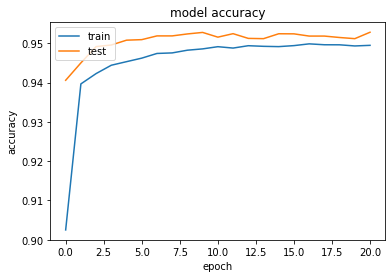

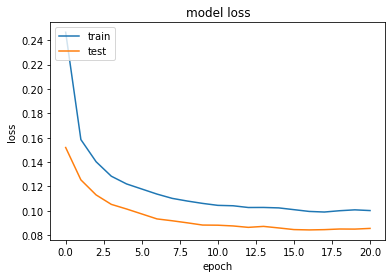

In [25]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12600/12600 [==============================] - 1s 44us/step
Test set
  Loss: 0.086
  Accuracy: 0.952
